# Проект "Принятие решений в бизнесе"

**Содержание**
1. [Описание проекта](#start)
2. [Приоритизация гипотез](#prior)
3. [Анализ А/В теста](#analize)
4. [Проверка гипотез](#hip)    
5. [Общий вывод](#end)    

<a id="start"></a>
## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Цели проекта:
- Приоритизировать гипотезы
- Проанализировать А/В тест

Итак, проект будет состоять из 2 частей. В **первой** части нужно будет приоритизировать гипотезы. Будет дан список из 9 гипотез с уже рассчитанными для каждой гипотезы параметрами. Задача состоит в применении фреймворков ICE и RICE и анализе и сравнении результатов.\
**Вторая** часть - это А/В тест и его анализ. Будут даны 2 таблицы с результатами теста. Необходимо сделать предобработку данных, построить нужные графики для анализа, проанализировать выбросы и провести статистический тест с "сырыми" и "очищенными данными". По результатам теста принять решение и объяснить его.

<a id="prior"></a>
## Приоритизация гипотез

Гипотезы приоритизируют для того, чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса. Мы будем использовать в проекте одни из самых популярных методов приоритизации гипотез: ICE и RICE. У каждой гипотезы есть 4 параметра, каждому из которых ставят оценку по шкале от 1 до 10: **Reach(обхват), Impact(степень удовлетворения от продукта), Confidence(Уверенность, что это изменение повлияет на пользователей именно так),Efforts(стоимость тестирования гипотезы).** И по этим параметрам рассчитываются ICE и RICE.   

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_colwidth = 400

Посмотрим на данные.

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Применим фреймворк ICE для приоритизации гипотез.**

In [3]:
data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']

In [4]:
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Теперь применим фреймворк RICE для приоритизации гипотез.**

In [5]:
data['RICE'] = (data['Reach']* data['Impact'] * data['Confidence']) / data['Efforts']

In [6]:
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод**

Итак, наиболее перспективные гипотезы по ICE - это 8, 0, 7 и 6. А согласно RICE, самые перспективные гипотезы - 7, 2, 0 и 6. При сравнении этих 2 гипотез, мы видим, что приоритет у гипотез поменялся. Случилось это потому, что у RICE добавился еще один компонент при подсчете - Reach(обхват пользователей). Если при ICE на первом месте гипотеза 8, то при RICE гипотеза 8 улетела вниз, на 5 место, так как параметр Reach у нее всего лишь 1. Тогда как гипотеза 7, которая при ICE была на 3 месте, при RICE вышла на 1 место, так как параметр Reach у нее максимальный - 10. 

<a id="analize"></a>
## Анализ A/B-теста

Итак, у нас есть результаты проведенного А/В тестирования, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### Обзор данных

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Вывод**

Результаты А/В теста описаны в 2 таблицах: **orders** и **visitors**. В таблицах нет пропущенных значений. Единственное, надо привести названия колонок к "змеиному" регистру и перевести все даты в нужный тип.

### Предобработка данных

In [12]:
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [13]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [14]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

### Анализ данных

#### Построим график кумулятивной выручки по группам.

Для начала хочу проверить, есть ли пользователи, которые попали и в группу А, и в группу В.

In [15]:
# отберем группы из данных с заказами 
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"')   

In [16]:
# создадим список уникальных ID пользователей, которые есть и в группе А,
# и в группе В
group_a_b = []
for i in group_a['visitor_id']:
    for j in group_b['visitor_id']:
        if i == j and i not in group_a_b:
            group_a_b.append(i)
len(group_a_b)

58

In [17]:
orders['visitor_id'].nunique()

1031

Итак, у нас 58 человек, которые входят и в группу А, и в группу В. Это около 5 % от общего количества пользователей. Думаю, их надо убрать из таблицы, так как они могут исказить результат эксперимента (да и не понятно, в какуюгруппу их надо по итогу включить).

In [18]:
orders = orders.query('visitor_id not in @group_a_b')

По новой таблице будем строить график кумулятивной выручки по группам.

In [19]:
# создадим массив уникальных пар значений дат и групп теста
unique_dates_groups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = unique_dates_groups.apply(lambda x:\
orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',\
'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 

# получим агрегированные кумулятивные по дням данные о посетителях 
visitors_aggregated = unique_dates_groups.apply(lambda x:\
visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])


In [20]:
# объединим кумулятивные данные в одной таблице
cumulative_data = (
    orders_aggregated.merge(visitors_aggregated,
    left_on=['date', 'group'], right_on=['date', 'group'])
)    

In [21]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [22]:
cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

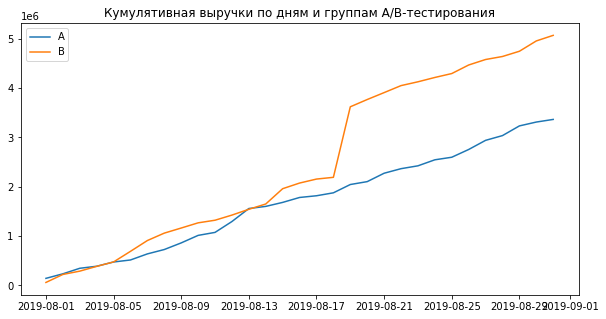

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой
# по дням в группе А
cumulative_rev_A = cumulative_data[cumulative_data['group']=='A']\
[['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой 
# по дням в группе B
cumulative_rev_B = cumulative_data[cumulative_data['group']=='B']\
[['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue'], label='B')

plt.title('Кумулятивная выручки по дням и группам A/B-тестирования')
plt.legend()
plt.show() 

**Вывод**

График группы А практически равномерно увеличивается в течение всего теста. А вот у группы В есть резкий скачок вверх в середине теста. Это может свидетельствовать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. При заключительном анализе от выбросов надобудет избавиться.

#### Построим график кумулятивного среднего чека по группам. 

Для этого разделим кумулятивную выручку на кумулятивное число заказов.

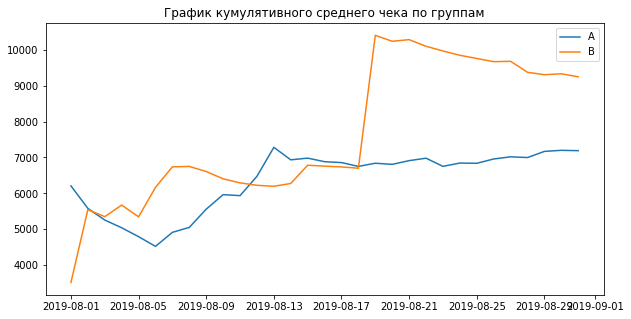

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rev_A['date'], cumulative_rev_A['revenue']/cumulative_rev_A['orders'], label='A')
plt.plot(cumulative_rev_B['date'], cumulative_rev_B['revenue']/cumulative_rev_B['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.show() 

**Вывод**

Средний чек для группы А становится равномерным ближе к концу теста. Хотя вначале мы видим взлеты и падения суммы среднего чека группы **А**. А вот у группы **В** мы видим большой скачок, к концу теста средний чек становится более равномерным, но постепенно падает. Возможно, в группу **B** в середине теста попали крупные заказы (резкий всплеск на графике).Надо будет дополнительно проанализировать выбросы.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

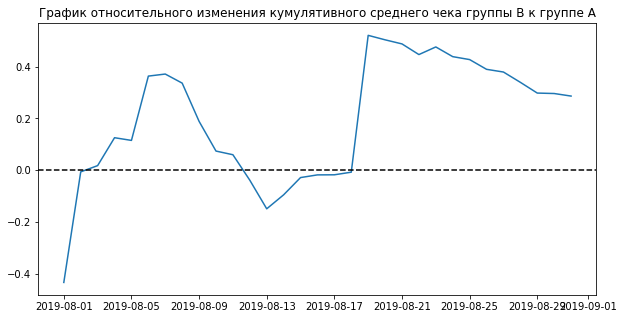

In [25]:
plt.figure(figsize=(10, 5))

# соберем данные в одном датасете
сumulative_rev = cumulative_rev_A.merge(cumulative_rev_B, left_on='date',\
                 right_on='date', how='left', suffixes=['A', 'B'])

# поcтроим отношение средних чеков
plt.plot(сumulative_rev['date'], (сumulative_rev['revenueB']/сumulative_rev['ordersB'])\
               /(сumulative_rev['revenueA']/сumulative_rev['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show() 

**Вывод**

В нескольких точках график различия между сегментами резко скачет. Где-то точно есть крупные заказы и выбросы.

#### Постройте график кумулятивной конверсии по группам

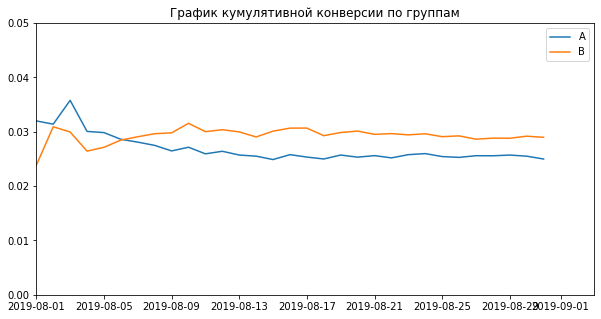

In [26]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# делаем срезы данных по группе A и В
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.legend()

# Зададим диапазон дат и масштаб по оси Х
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-03'), 0, 0.05])
plt.show() 

**Вывод**

Конверсия обеих групп немного колебалась вначале, но потом конверсия группы В вышла вперед и зафиксировалась около одного значения, тогда как конверсия группы А стала ниже и тоже зафиксировалась.

#### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

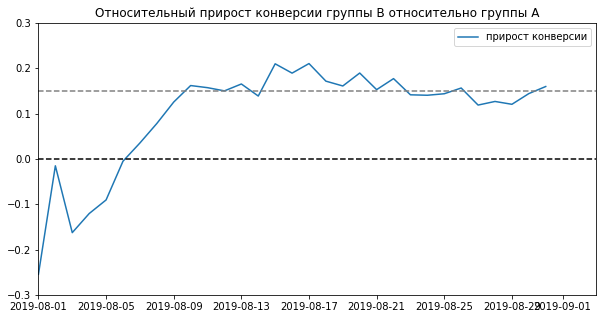

In [27]:
# Объединим таблицы с конверсией групп А и В
сumulative_сonv = cumulative_data_A[['date','conversion']]\
.merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(сumulative_сonv['date'], сumulative_сonv['conversionB']/сumulative_сonv['conversionA']-1, label='прирост конверсии')
plt.legend()

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-03'), -0.3, 0.3])
plt.show()

**Вывод**

В самом начале теста конверсия В резко упала относительно конверсии А, но затем вырвалась вперед.  Прирост конверсии группы В относительно конверсии группы А колебается около значения 15%. В целом,в последней трети эксперимента наблюдается стабилизация результатов.

#### Построим точечный график количества заказов по пользователям. 

In [28]:
# Подсчитаем количество заказов по пользователям 
orders_by_users = orders.groupby('visitor_id', as_index=False)\
                        .agg({'transaction_id':'nunique'})\
                        .sort_values(by='transaction_id', ascending=False)
orders_by_users.columns = ['visitor_id', 'orders']    
orders_by_users.head()

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


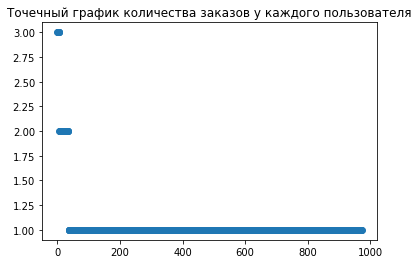

In [29]:
# Построим график
plt.title('Точечный график количества заказов у каждого пользователя')
values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(values, orders_by_users['orders'])
plt.show()

**Вывод**

Заказов больше 1 совсем мало, т.е. они вполне могут быть аномальными. Посмотрим на 95-й и 99-й процентили, чтобы точно ответить на вопрос аномальности этих заказов.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [30]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

**Вывод**

Итак, мы видим, что не более 5 % от всех пользователей совершали больше 1 заказов, и не более 1% - больше 2. Можно принять за аномальных пользователей тех, у кого больше 2 заказов.

#### Построим точечный график стоимостей заказов.

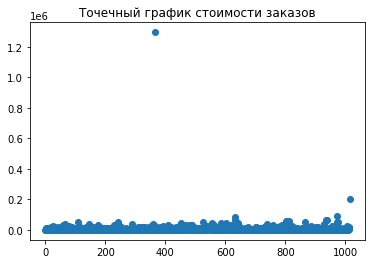

In [31]:
plt.title('Точечный график стоимости заказов')
value = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(value, orders['revenue'])
plt.show()

**Вывод**

Есть выбросы в районе 200 000 и 1 200 000 рублей. Посмотрим на перцентили.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод**

Итак,по согласно перцентилям, не более, чем у 5% заказов чек дороже, чем 26785 руб., и не более 1 % - дороже 53904 руб. Думаю, можно принять за аномальных пользователей тех, у кого заказ дороже 53904 рублей. 

<a id="hip"></a>
## Проверка гипотез

#### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Для начала хочу проверить, нормально ли распределение данных (сумм заказов) с помощью критерия Шапиро-Уилка.

In [33]:
alpha = 0.05  # установим критический уровень статистической значимости

results = st.shapiro(orders['revenue'])
p_value = results[1]

display('p-значение: ', p_value)

if p_value < alpha:
    display('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    display('Не получилось отвергнуть нулевую гипотезу, всё нормально')

'p-значение: '

0.0

'Отвергаем нулевую гипотезу: распределение не нормально'

**Вывод**

Итак, распределение не нормально. Этого следовало ожидать, так как данные о продажах и средних чеках редко бывают нормальные. В наших данных, как мы уже убедились выше, есть аномальные выбросы. Поэтому для тестировании будем использовать тест Уилкоксона-Манна-Уитни, так как выбросы могут существенно повлиять на результат.

**ГИПОТЕЗЫ**

- H0: Конверсии группы А и группы В одинаковые.
- H1: Конверсии группы А и группы В одинаковые различаются.

Сначала подготовим данные для дальнейшего теста.

In [34]:
# Сделаем срез по основной таблице с группой А
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitorsPerDateA']

# Создадим таблицу с куммулятивными данными о посетителях группы А
visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitorsCummulativeA']

In [35]:
# Теперь то же самое сделаем для группы В
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitorsPerDateB']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitorsCummulativeB']


In [36]:
# Создадим таблицу с пользователями группы А, где 
# для каждой даты будет подсчитано количество заказов и сумма всех чеков
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Создадим таблицу группы А с куммулятивным количеством заказов 
# и куммулятивной суммой заказов по каждому дню
orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [37]:
# Создадим таблицу с пользователями группы B, где 
# для каждой даты будет подсчитано количество заказов и сумма всех чеков
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Создадим таблицу группы B с куммулятивным количеством заказов 
# и куммулятивной суммой заказов по каждому дню
orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [38]:
# Объединим все созданные таблицы в одну
df = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

df.head(5)


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**Теперь можно подсчитать статистическую значимость различия в конверсии между группами.**

Итак, напомню наши **гипотезы.**

- H0: Конверсии группы А и группы В одинаковые.
- H1: Конверсии группы А и группы В одинаковые различаются.

In [39]:
# Создадим переменные orders_by_users_A и orders_by_users_B, где для 
# пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders']

In [40]:
# Объявим переменные sample_A и sample_B, в которых пользователям из разных 
# групп будет соответствовать количество заказов. Тем, кто ничего не заказал, 
# будут соответствовать нули
sample_A = pd.concat([orders_by_users_A['orders'],\
  pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(orders_by_users_A['orders'])),\
  name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],\
  pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(orders_by_users_B['orders'])),\
  name='orders')],axis=0) 


In [41]:
# Установим пороговое значение
alpha = 0.05

In [42]:
# Применим критерий Манна-Уитни, округлив до 3 знаков после запятой,
# также найдем относительный прирост конверсии группы B и округлим
p_value = '{0:.3f}'.format(st.mannwhitneyu(sample_A, sample_B)[1])
p_value = float(p_value)
growth_conversion = '{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1)

In [43]:
display('p-значение:', p_value)
if (p_value < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.011

'Отвергаем нулевую гипотезу'

In [44]:
display('относительный прирост конверсии группы B:', growth_conversion)

'относительный прирост конверсии группы B:'

'0.160'

**Вывод**

Итак, p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Скорее всего, различия в конверсии есть. Относительный прирост группы B относительно группы А равен 16%.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**ГИПОТЕЗЫ**

- Н0: Различий в среднем чеке между группами нет. 
- Н1: Различия в среднем чеке между группами есть.

In [45]:
# Передадим критерию mannwhitneyu() данные о выручке с заказов
# и найдём относительные различия в среднем чеке между группами
p_val = '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                  orders[orders['group']=='B']['revenue'])[1])
p_val = float(p_val)

# Найдём относительные различия в среднем чеке между группами
growth_cheque = '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/\
                         orders[orders['group']=='A']['revenue'].mean()-1)

In [46]:
display('p-значение:', p_val)
if (p_val < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.829

'Не получилось отвергнуть нулевую гипотезу'

In [47]:
display('относительный прирост среднего чека группы B:', growth_cheque)

'относительный прирост среднего чека группы B:'

'0.287'

**Вывод**

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое значение среднего чека групп  в 28% не является статистически значимым. Проведем еще раз статистический тест, исключив выбросы.

#### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

**ГИПОТЕЗЫ**

- H0: Конверсии группы А и группы В одинаковые.
- H1: Конверсии группы А и группы В одинаковые различаются.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53904 рублей.

In [48]:
# Сделаем срез пользователей с числом заказов больше 2 — users_with_many_orders
order_lim = np.percentile(orders_by_users['orders'], 99)
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > order_lim]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > order_lim]['visitor_id'],
    ],
    axis=0,
)

# Сделаем срез пользователей , совершивших заказы дороже 30 000 
revenue_lim = np.percentile(orders['revenue'], 99)
users_with_expensive_orders = orders[orders['revenue'] > revenue_lim]['visitor_id']


In [49]:
# Объединим их в общей таблице
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users
abnormal_users.shape

(16,)

Всего 16 аномальных пользователей.

Сначала подготовим выборки количества заказов по пользователям по группам теста, исключив аномальных пользователей.

In [50]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


In [51]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
p_value_new = '{0:.3f}'.format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1])
p_value_new = float(p_value_new)
growth_conversion_new = '{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)

In [52]:
display('p-значение:', p_value_new)
if (p_value_new < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.007

'Отвергаем нулевую гипотезу'

In [53]:
display('Относительный прирост конверсии отфильтрованной группы B:', growth_conversion_new)

'Относительный прирост конверсии отфильтрованной группы B:'

'0.189'

**Вывод**

Результаты по конверсии практически не изменились. Относительный прирост по конверсии у группы В стал чуть больше.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**ГИПОТЕЗЫ**

- Н0: Различий в среднем чеке между группами нет. 
- Н1: Различия в среднем чеке между группами есть.

In [54]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
p_val_new = '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[np.logical_and(orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[np.logical_and (orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
p_val_new = float(p_val_new)

In [55]:
# Найдём относительные различия в среднем чеке между группами
growth_cheque_new = '{0:.3f}'.format(
        orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )

In [56]:
display('p-значение:', p_val_new)
if (p_val_new < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение:'

0.788

'Не получилось отвергнуть нулевую гипотезу'

In [57]:
display('Относительная разница среднего чека между отфильтрованными группами:', growth_cheque_new)

'Относительная разница среднего чека между отфильтрованными группами:'

'-0.032'

**Вывод**

Итак, нулевую гипотезу опровергнуть не удалось,значит, скорее всего, разницы между средними чеками групп нет. Наблюдаемое различие между средними чеками в 3 % не является статистически важным. 

<a id="end"></a>
## Общий вывод

Итак, какие мы получили результаты:
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. 
- И по сырым данным, и по фильтрованным нет статистически значимого различия по среднему чеку между группами. Единственное, если до фильтрации относительная разница среднего чека группы В по отношению к А была положительной (то есть чек группы В был больше), то после фильтрации средний чек группы В, наоборот, стал меньше.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту. Но пока конверсия не установилась. Продемонстрирую это ниже.

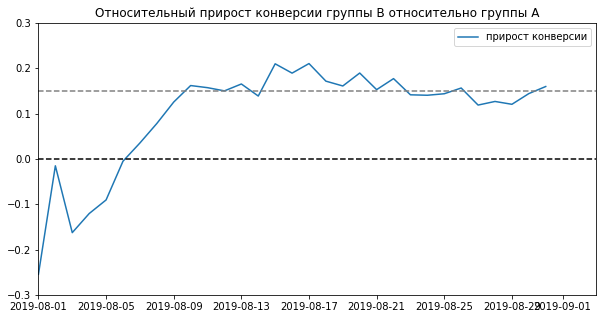

In [58]:
# Построим график
plt.figure(figsize=(10, 5))
plt.plot(сumulative_сonv['date'], сumulative_сonv['conversionB']/сumulative_сonv['conversionA']-1, label='прирост конверсии')
plt.legend()

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-03'), -0.3, 0.3]);

**Проанализировав результаты, я пришла к выводу,что А/В тестирование можно закончить. Тест оказался успешным по конверсии (то есть конверсия у группы В выше, чем у группы А). К тому же график относительного прироста конверсии показал, что конверсия зафиксировалась. И поскольку конверсия группы В выше, то даже при сохранившемся средним чеком, выручка будет расти.**